## Machine Learning Project 1 - Predict Used Car Price

### Data Science / Machine Learning Project Life Cycle

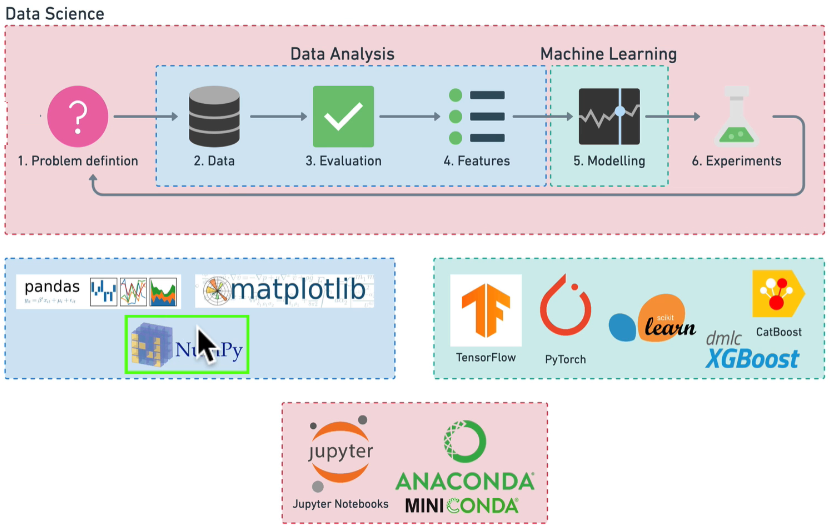

#### Problem Definition:
In this project we are going to build an end-to-end machine learning model to predict used car proce. We are going to use a simple dataset with 1000 records of used car sales data and each record has 5 columns or features. 

### Project Steps:

1. [Prepare the data](#s1)
2. [Choose the right model for the given problem](#s2)
3. Train the model with data and make prediction
4. Evaluate the performance of the model
5. Tube to improve the performance of the model
6. Save and load the trained model

<a id="s1"></a>
### Step 1 - Prepare the data
In this step we will perform the following tasks -
* [Import data from the source file into pandas dataframe](#s1_t1)
* [Review and analyze the dataframe](#s1_t2)
* [Transform value of one or more columns (if necessary)](#s1_t3)
* [Handle missing value in the dataframe (if necessary)](#s1_t4)
* [Convert columns with string into numbers (if necessary)](#s1_t5)

<a id="s1_t1"></a>
#### Import data from the source file into pandas dataframe

In [1]:
# import pandas library
import pandas as pd

In [2]:
# Read data from the source file into the dataframe
cars = pd.read_csv("data/car-sales-data.csv")

<a id="s1_t2"></a>
#### Review and analyze the dataframe

In [3]:
# Review first 5 records of the dataframe
cars.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,"$15,323.00"
1,BMW,Blue,192714.0,5.0,"$19,943.00"
2,Honda,White,84714.0,4.0,"$28,343.00"
3,Toyota,White,154365.0,4.0,"$13,434.00"
4,Nissan,Blue,181577.0,3.0,"$14,043.00"


In [4]:
# Number of rows and columns in the dataframe
cars.shape

(1000, 5)

In [5]:
# Find out the data types and if any missing value for every column in the dataframe
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          1000 non-null   object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


<a id="s1_t3"></a>
#### Transform value of one or more columns
From the result of the info function we understand that the *Price* column in the dataframe is of object or string datatype. As that is our target variable, meaning we would like to train our machine learning model to predict the car price, we will need to convert that column into numeric.

In [7]:
# Create a new column in the dataframe removing the $ and , and the trailing decimal part
cars["price"] = cars["Price"].str.replace('$','').str.replace(',','').str.replace('.00','')
cars.head()

,Make,Colour,Odometer (KM),Doors,Price,price
0,Honda,White,35431.0,4.0,"$15,323.00",15323
1,BMW,Blue,192714.0,5.0,"$19,943.00",19943
2,Honda,White,84714.0,4.0,"$28,343.00",28343
3,Toyota,White,154365.0,4.0,"$13,434.00",13434
4,Nissan,Blue,181577.0,3.0,"$14,043.00",14043


In [8]:
# Convert the new column 'price' from object to integer
cars["price"] = cars["price"].astype(int)

ValueError: invalid literal for int() with base 10: ''

In [10]:
# The above line throws error converting price to an integer and the details of the error showd it couldn't convert values 
# like '' into integer. Let's check few samples of such records
cars[cars['price'].str.len() < 4].head()

,Make,Colour,Odometer (KM),Doors,Price,price
119,BMW,White,18394.0,5.0,$.00,
152,Toyota,White,66538.0,4.0,$.00,
171,Toyota,White,97036.0,4.0,$.00,
176,Toyota,Blue,94916.0,4.0,$.00,
249,BMW,Red,33911.0,5.0,$.00,


In [15]:
# Replace those '' values in price column with '0', which will allow us to convert the column to an integer
cars.loc[cars["Price"] == "$.00", ["price"]] = '0'
cars[cars["Price"] == "$.00"].head()

,Make,Colour,Odometer (KM),Doors,Price,price
119,BMW,White,18394.0,5.0,$.00,0
152,Toyota,White,66538.0,4.0,$.00,0
171,Toyota,White,97036.0,4.0,$.00,0
176,Toyota,Blue,94916.0,4.0,$.00,0
249,BMW,Red,33911.0,5.0,$.00,0


In [22]:
# Convert datatype of the price column from object/string to integer
print({cars['price'].dtype})
cars['price'] = cars['price'].astype(int)
print({cars['price'].dtype})


{dtype('O')}
{dtype('int32')}


In [24]:
# Drop the Price column from the dataframe
cars.drop(['Price'], axis=1, inplace=True)
cars.head()

,Make,Colour,Odometer (KM),Doors,price
0,Honda,White,35431.0,4.0,15323
1,BMW,Blue,192714.0,5.0,19943
2,Honda,White,84714.0,4.0,28343
3,Toyota,White,154365.0,4.0,13434
4,Nissan,Blue,181577.0,3.0,14043


In [26]:
# Check the datatypes of all columns in the dataframe
cars.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
price              int32
dtype: object

[Go to the section index](#s1)

<a id="s1_t4"></a>
#### Handle missing value in the dataframe

In [27]:
# Count of records having missing values in each column
cars.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
price             0
dtype: int64

In [28]:
# The price column has no missing values, however from the data conversion we done on that column, we know that it has 
# records with 0 price. Let's identify those records
cars[cars['price'] == 0].shape[0]

50

In [42]:
# As price is the target column for our analysis so having 0 value there won't help to train and test our model. 
# So we will go and drop those rows.
print(f"Number of records in the dataframe before dropping rows: {len(cars.index)}")
cars.drop(cars[cars['price'] == 0].index, inplace=True)
print(f"Number of records in the dataframe after dropping rows: {cars.shape[0]}")

Number of records in the dataframe before dropping rows: 1000
Number of records in the dataframe after dropping rows: 950


In [44]:
# For the missing values in the other 4 columns, we will fill those out with certain value, the method is also called imputation
# For the 2 categorical columns, such as Make and Color, we can replace the missing with a specific value such as 'missing' or
# we can replace with the mode value of the column, meaning the most frequent value in that column. 

cars['Make'].value_counts()

Make
Toyota    354
Honda     281
Nissan    175
BMW        93
Name: count, dtype: int64

In [45]:
cars['Colour'].value_counts()

Colour
White    370
Blue     292
Black     89
Red       81
Green     72
Name: count, dtype: int64

In [54]:
# From the above commands, we see Toyota and White are the highest occuring value in the Make and Colour fields respectively. 
# So filling the missing values with those values in the respective column seems to be a better option than filling those with 
# 'Missing' which will introduce a different category.

cars['Make'].fillna((cars['Make'].mode())[0], inplace=True)
cars['Colour'].fillna((cars['Colour'].mode())[0], inplace=True)

# Check number of missing values in the dataframe
cars.isnull().sum()

Make              0
Colour            0
Odometer (KM)    48
Doors            47
price             0
dtype: int64

In [58]:
# Check how many cars in the dataframe with Make as Toyota and Colour as White, after the imputation

print(f"Number of cars with Make as Toyota: {len(cars[cars['Make'] == 'Toyota'].index)}")
print(f"Number of cars with Colour as White: {len(cars[cars['Colour'] == 'White'].index)}")

Number of cars with Make as Toyota: 401
Number of cars with Colour as White: 416


In [60]:
# Before we impute the numeric columns such as Odometer and Doors with certain value, let's first inspect the current values in 
# those columns
cars[['Odometer (KM)','Doors']].describe()

,Odometer (KM),Doors
count,902.000000,903.000000
mean,130987.447894,4.007752
std,68707.667359,0.386791
min,10148.000000,3.000000
25%,71362.500000,4.000000
50%,130660.500000,4.000000
75%,192299.500000,4.000000
max,249860.000000,5.000000


In [61]:
# From the above command we can see that the mean and median values of both Odometer and Doors columns are close.
# So we will impute the Odometer column with the mean value and Doors column with 4

cars['Odometer (KM)'].fillna(int(cars['Odometer (KM)'].mean()), inplace=True)
cars['Doors'].fillna(4, inplace=True)

# Check the missing values in the dataframe
cars.isnull().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
price            0
dtype: int64

[Go to the section index](#s1)

<a id="s1_t5"></a>
#### Convert columns with string into numbers

We know that the Make and Colour columns are categorical, so we will apply a method called Encoding to convert them into 
numbers so that the machine learning model can understand. There are 2 ways of Encoding -
- **Label Encoding** - Here we replace each categorical value with a corresponding number, such as replace Toyota by 1, Honda by 2 and so on for the make column. However the problem of this approach is the numeric value can falsely represent an order to the machine learning model, meaning Honda having value 2 is higher than Toyota having value 1, which is not the case.
- **OneHot Encoding** - Here we create a new column for each of the categorical value and fill the column with 1 and 0. Though this may create lots of new columns in the dataframe and make it wider depending on the number of categorical columns and number of categories in each column. However this approach is better machine learning model. So we are going to use this approach. 

In [62]:
# Let's check the dataframe before encoding
cars.head()

,Make,Colour,Odometer (KM),Doors,price
0,Honda,White,35431.0,4.0,15323
1,BMW,Blue,192714.0,5.0,19943
2,Honda,White,84714.0,4.0,28343
3,Toyota,White,154365.0,4.0,13434
4,Nissan,Blue,181577.0,3.0,14043


In [73]:
# Apply onehot encoding for column Make and Colour and create a new dataframe with the encoded columns

cars_encoded = pd.get_dummies(cars, columns=["Make", "Colour"], dtype=int)
cars_encoded.head()

,Odometer (KM),Doors,price,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,35431.0,4.0,15323,0,1,0,0,0,0,0,0,1
1,192714.0,5.0,19943,1,0,0,0,0,1,0,0,0
2,84714.0,4.0,28343,0,1,0,0,0,0,0,0,1
3,154365.0,4.0,13434,0,0,0,1,0,0,0,0,1
4,181577.0,3.0,14043,0,0,1,0,0,1,0,0,0


In [77]:
# Now we know that the Doors column is numeric, however there can only be few options of number of doors in a car, so logically
# it should be categorical column. Let's check what are the values in the Doors column

cars_encoded['Doors'].value_counts()

Doors
4.0    815
5.0     71
3.0     64
Name: count, dtype: int64

In [78]:
# From the above code it proves our assumption that though Doors column is of numeric datatype but it contains 3 categorical
# numbers. So let's apply onehot encoding to the Doors column as well.

cars_encoded = pd.get_dummies(cars_encoded, columns=['Doors'], dtype=int)
cars_encoded.head()

,Odometer (KM),price,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3.0,Doors_4.0,Doors_5.0
0,35431.0,15323,0,1,0,0,0,0,0,0,1,0,1,0
1,192714.0,19943,1,0,0,0,0,1,0,0,0,0,0,1
2,84714.0,28343,0,1,0,0,0,0,0,0,1,0,1,0
3,154365.0,13434,0,0,0,1,0,0,0,0,1,0,1,0
4,181577.0,14043,0,0,1,0,0,1,0,0,0,1,0,0


[Go to the section index](#s1)

<a id="s2"></a>
### Step 2 - Choose the right model for the given problem